In [124]:
import numpy as np 
import pandas as pd

In [125]:
data = pd.read_csv("source/tr_eikon_eod_data.csv", index_col=0, parse_dates=True)
data.head(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.8
2010-01-05,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7


In [126]:
data = pd.DataFrame(data['AAPL.O'])
data.head(3)

,AAPL.O
Date,
2010-01-01,NaN
2010-01-04,30.572827
2010-01-05,30.625684


In [127]:
data['Returns'] = np.log(data / data.shift())
data.head(3)

,AAPL.O,Returns
Date,,
2010-01-01,NaN,NaN
2010-01-04,30.572827,NaN
2010-01-05,30.625684,0.001727


In [128]:
data.dropna(inplace=True)
data.head(3)

,AAPL.O,Returns
Date,,
2010-01-05,30.625684,0.001727
2010-01-06,30.138541,-0.016034
2010-01-07,30.082827,-0.001850


In [129]:
lags = 6
cols = []

for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))
    cols.append(col)
    # data.dropna(inplace=True)
    
data.head(10)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-05,30.625684,0.001727,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,-0.016034,1.0,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,-0.001850,-1.0,1.0,NaN,NaN,NaN,NaN
2010-01-08,30.282827,0.006626,-1.0,-1.0,1.0,NaN,NaN,NaN
2010-01-11,30.015684,-0.008861,1.0,-1.0,-1.0,1.0,NaN,NaN
2010-01-12,29.674256,-0.011440,-1.0,1.0,-1.0,-1.0,1.0,NaN
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0


In [130]:
data.dropna(inplace=True)
data.head(3)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0


In [131]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(data[cols], np.sign(data['Returns']))

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [132]:
data['Prediction'] = model.predict(data[cols])
data.head(3)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction
Date,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [133]:
data['Strategy'] = data['Prediction'] * data['Returns']
data.head(3)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.014007
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.005808
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,0.016853


<Axes: xlabel='Date'>

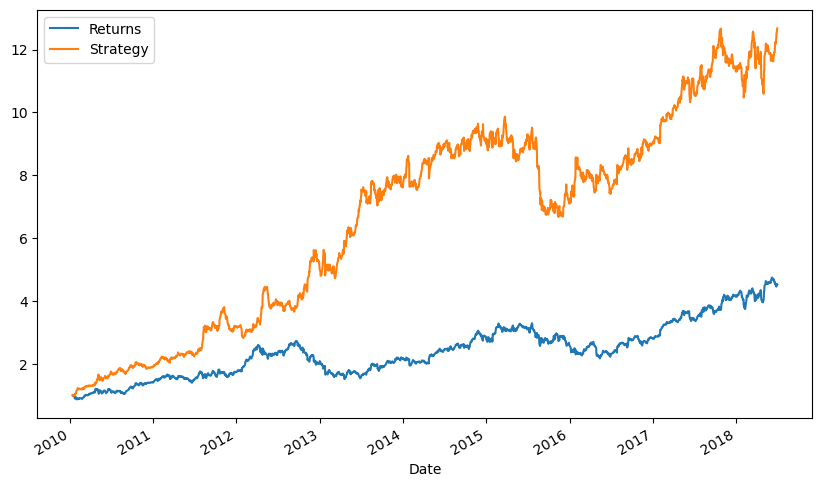

In [134]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))